In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
%pip install xgboost
from xgboost import XGBClassifier
%pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Data read

In [63]:
titanic_data=pd.read_csv("Titanic-Dataset.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
titanic_data.shape
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fill missing/null values

In [66]:
titanic_data=titanic_data.drop(columns='Cabin',axis=1)
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data.isnull().sum()

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_12772\4277881331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

replace mode value

In [67]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_12772\1876590544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)


Analysis

In [68]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Sex', ylabel='count'>

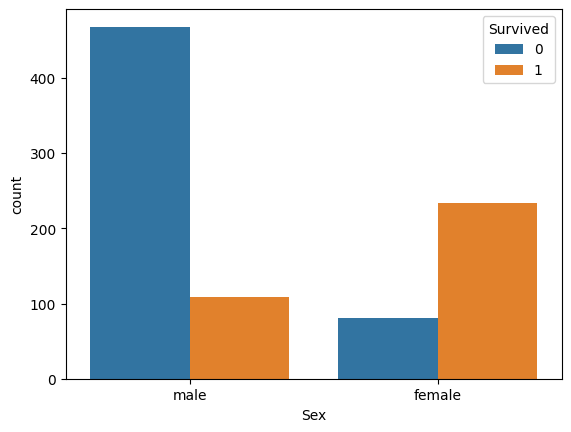

In [69]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

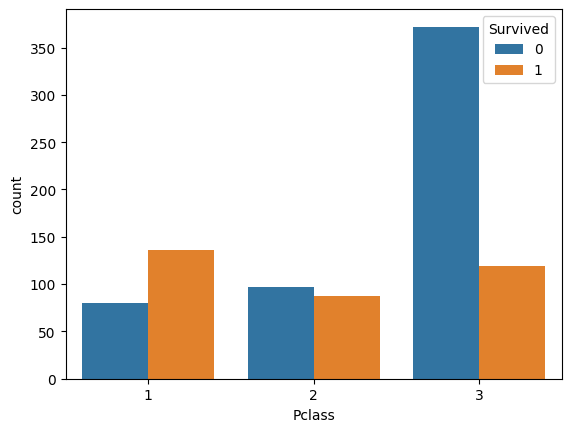

In [70]:
sns.countplot(x="Pclass",hue="Survived",data=titanic_data)

Encode categorical columns

In [71]:
titanic_data=titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_12772\3720930560.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data=titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})


In [72]:
X=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=titanic_data['Survived']
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


Split data into test and train

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [74]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


Model

Logistic Regression 

In [75]:
model1=LogisticRegression()
model1.fit(X_train,Y_train)
X_train_prediction= model1.predict(X_train)
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("train data prediction accuracy: ",train_data_accuracy)
X_test_prediction=model1.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("test data prediction accuracy: ",test_data_accuracy)

train data prediction accuracy:  0.8075842696629213
test data prediction accuracy:  0.7821229050279329


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier

In [76]:
model2=RandomForestClassifier()
model2.fit(X_train,Y_train)
X_train_prediction= model2.predict(X_train)
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("train data prediction accuracy: ",train_data_accuracy)
X_test_prediction=model2.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("test data prediction accuracy: ",test_data_accuracy)

train data prediction accuracy:  0.9859550561797753
test data prediction accuracy:  0.8100558659217877


GaussianNB

In [77]:
model3=GaussianNB()
model3.fit(X_train,Y_train)
X_train_prediction= model3.predict(X_train)
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("train data prediction accuracy: ",train_data_accuracy)
X_test_prediction=model3.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("test data prediction accuracy: ",test_data_accuracy)

train data prediction accuracy:  0.7935393258426966
test data prediction accuracy:  0.7597765363128491


XGBClassifier

In [78]:
model4=XGBClassifier()
model4.fit(X_train,Y_train)
X_train_prediction= model4.predict(X_train)
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("train data prediction accuracy: ",train_data_accuracy)
X_test_prediction=model4.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("test data prediction accuracy: ",test_data_accuracy)

train data prediction accuracy:  0.973314606741573
test data prediction accuracy:  0.7988826815642458


CatBoostClassifier

In [79]:
model5=CatBoostClassifier()
model5.fit(X_train,Y_train)
X_train_prediction= model5.predict(X_train)
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("train data prediction accuracy: ",train_data_accuracy)
X_test_prediction=model5.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("test data prediction accuracy: ",test_data_accuracy)

Learning rate set to 0.008911
0:	learn: 0.6867738	total: 2.46ms	remaining: 2.46s
1:	learn: 0.6803157	total: 4.97ms	remaining: 2.48s
2:	learn: 0.6744278	total: 8.53ms	remaining: 2.83s
3:	learn: 0.6687170	total: 11.4ms	remaining: 2.85s
4:	learn: 0.6653892	total: 12.6ms	remaining: 2.51s
5:	learn: 0.6600833	total: 14.8ms	remaining: 2.46s
6:	learn: 0.6545342	total: 17.3ms	remaining: 2.45s
7:	learn: 0.6510864	total: 18.6ms	remaining: 2.31s
8:	learn: 0.6451919	total: 21.2ms	remaining: 2.33s
9:	learn: 0.6396517	total: 24.8ms	remaining: 2.46s
10:	learn: 0.6352895	total: 26.6ms	remaining: 2.39s
11:	learn: 0.6313568	total: 28.2ms	remaining: 2.33s
12:	learn: 0.6272851	total: 29.4ms	remaining: 2.23s
13:	learn: 0.6226046	total: 32.7ms	remaining: 2.3s
14:	learn: 0.6179779	total: 35ms	remaining: 2.3s
15:	learn: 0.6127073	total: 37.2ms	remaining: 2.29s
16:	learn: 0.6079932	total: 39.6ms	remaining: 2.29s
17:	learn: 0.6037105	total: 41.6ms	remaining: 2.27s
18:	learn: 0.6009113	total: 44ms	remaining: 2.27

Since RandomForestClassifier has highest accuracy, it will be used for predicting random input

In [81]:
model=model2

Make an Interface for input and output

In [82]:
import gradio as gr
def predict(pclass,sex,age,sibSp,parch,fare,embarked):
    if(sex=="M"):
        sex=0
    else:
        sex=1
    if(embarked=="S"):
        embarked=0
    elif(embarked=="C"):
        embarked=1
    else:
        embarked=2
    pclass=int(pclass)
    sex=int(sex)
    embarked=int(embarked)
    age=float(age)
    sibSp=int(sibSp)
    parch=int(parch)
    fare=float(fare)
    features=[[pclass,sex,age,sibSp,parch,fare,embarked]]
    prediction=model.predict(features)[0]
    if(prediction==1):
        return "Survived"
    else:
        return "Not Survived"
demo = gr.Interface(
    fn=predict,
    inputs=[
        gr.Radio(["1", "2","3"]),
        gr.Radio(["M", "F"]),
        gr.Slider(value=0, minimum=0, maximum=100, step=1),
        "number",
        "number",
        "number",
        gr.Radio(["S", "C","Q"]),
    ],
    outputs=["text"], 
)
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7870
Running on public URL: https://eafc0be73dad1417ba.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
